In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
import seaborn as sns
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import tensorboard
from pylab import rcParams
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
#check null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# Renaming Columns
data.rename(columns = {"Class": "Fraud"}, inplace = True)

In [16]:
#chepe check
data.shape

(284807, 31)

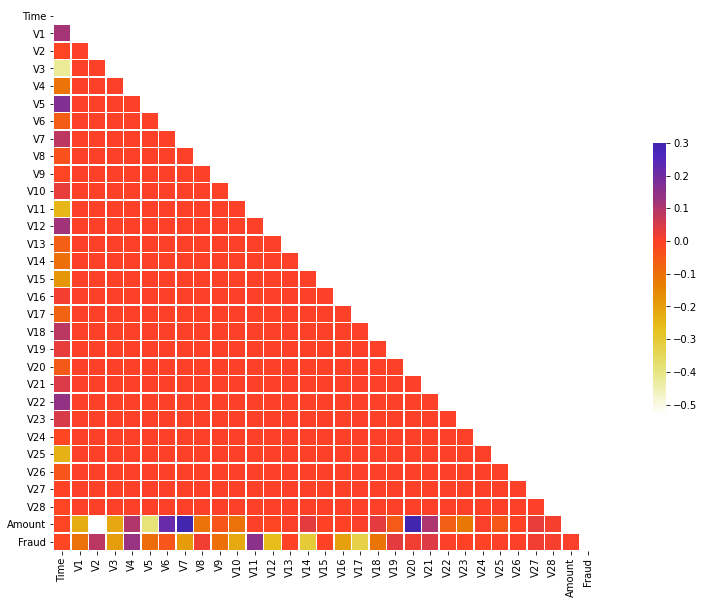

In [18]:
# Checking Correlations
correlations = data.corr()

# mask generate of upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# figure size
fig, ax = plt.subplots(figsize=(20, 10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap='CMRmap_r', vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

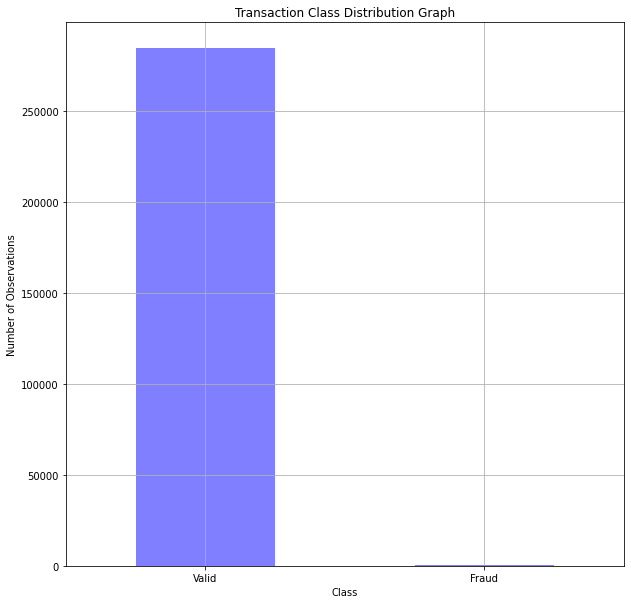

In [20]:
# Transaction Class Distribution Plot
labels = ['Valid', 'Fraud']
plt.figure(figsize = (10,10))
count_classes = pd.value_counts(data['Fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = 'blue', alpha = 0.5)
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution Graph")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.grid()
plt.show()

In [22]:
lenfraud = len(data[data.Fraud ==  1])
lenfraud

492

In [23]:
lenvalid = 284807 - 492
lenvalid

284315

In [24]:
percfraud = (lenfraud * 100) / len(data)
percfraud

0.1727485630620034

In [25]:
# Making DataFrames Of Valid And Fraud Transactions To Check Important Stats
Fraud_df = data[data.Fraud == 1]
Valid_df = data[data.Fraud == 0]

In [26]:
# Checking Important Stats of Amount used in Fraud Transactions
Fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
# Checking Imprtant Stats of Amount used in Valid Transactions
Valid_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

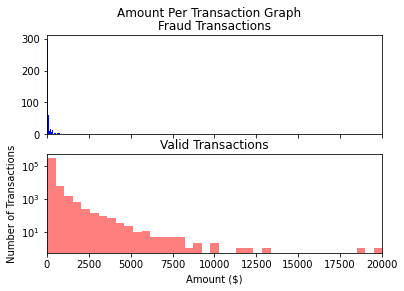

In [28]:
# Amount per transaction by class
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount Per Transaction Graph')

bins = 50

ax1.hist(Fraud_df.Amount, bins = bins, color='blue')
ax1.set_title('Fraud Transactions')

ax2.hist(Valid_df.Amount, bins = bins, color='red', alpha = 0.5)
ax2.set_title('Valid Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

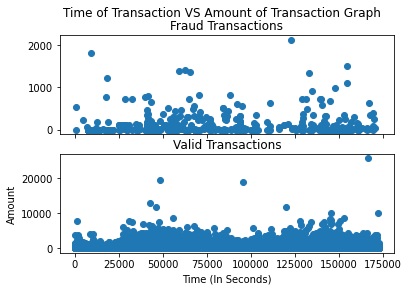

In [29]:
# Time of transaction vs Amount by class
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of Transaction VS Amount of Transaction Graph')

ax1.scatter(Fraud_df.Time, Fraud_df.Amount)
ax1.set_title('Fraud Transactions')

ax2.scatter(Valid_df.Time,Valid_df.Amount)
ax2.set_title('Valid Transactions')

plt.xlabel('Time (In Seconds)')
plt.ylabel('Amount')
plt.show()

In [31]:
# Normalizing Data
# We Need To Normalize Two Features: Time And Amount
from sklearn.preprocessing import StandardScaler
df_norm = data
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))

In [32]:
#Splitting Dataset Into Testing and Training Data

In [33]:
# Training Data
train_data = df_norm.iloc[:199365,:]
train_data.shape

(199365, 31)

In [34]:
# Testing Data
test_data = df_norm.iloc[199365:,:]
test_data.shape

(85442, 31)

In [35]:
# Shuffling Training And Testing Data
train_data = train_data.sample(frac=1)
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
152845,0.056185,1.979659,-0.388794,0.091306,0.440773,-0.680497,0.011049,-0.980511,0.001850,2.557641,-0.418712,0.104010,-1.859972,2.558120,0.954354,0.003527,0.649814,0.008333,0.273873,-0.481629,-0.130353,-0.115486,0.052401,0.344402,0.691787,-0.572151,0.408219,-0.040675,-0.035201,-0.289460,0
169284,0.522345,-0.272874,0.418744,-1.369366,-1.747570,3.500788,3.254872,1.024568,0.563872,-0.333527,-0.240433,-0.288867,-0.176292,-0.549779,0.325193,-0.433112,-0.764141,-0.352004,-0.801279,-0.066019,0.216388,0.003025,0.228734,-0.127613,0.753415,-0.153613,0.480323,0.172961,0.001032,-0.196944,0
117800,-0.421134,-1.456235,1.068063,1.389263,-1.426493,-0.415747,-1.006171,0.941513,-0.300238,0.867460,0.518437,-0.402138,-0.420434,-0.576298,-0.407550,0.679986,0.508032,-0.795107,-0.368768,-0.755683,0.318225,-0.261638,-0.276897,-0.114852,0.398590,-0.246172,0.697849,0.322829,0.164233,-0.091555,0
112858,-0.462955,1.371371,-0.653642,0.470721,-0.434235,-1.201336,-0.836790,-0.601014,-0.117129,-0.300821,0.513769,-0.754495,-0.838267,-0.905256,-0.275792,-0.383428,0.622410,0.734677,-1.650640,0.941932,0.007585,-0.025615,-0.052416,-0.030961,0.399722,0.521363,-0.242727,0.005539,0.013229,-0.269270,0
23611,-1.305020,-1.757948,-1.748385,1.144428,-1.569417,-0.022216,-0.648211,0.591681,0.001801,-1.053593,-0.395916,-1.819251,-0.958547,-0.068597,-0.133360,-0.008996,-0.237157,-1.142290,1.848792,-2.445216,0.301224,0.110595,-0.162455,0.618714,-0.501489,0.219742,0.366974,-0.095450,0.145973,0.905768,0


In [36]:
test_data = test_data.sample(frac = 1)
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
254341,1.302857,-1.026815,1.347655,1.678999,1.076095,-0.159834,0.332380,0.180416,0.674214,-0.151169,-0.725992,-1.147018,0.396502,-0.353512,0.012568,-0.774329,-0.919256,0.705391,-0.708746,1.122851,0.022037,-0.501306,-1.255198,-0.043672,1.013196,0.369165,-0.829902,0.233131,0.090088,-0.345273,0
229687,1.078211,2.018363,0.303747,-2.488605,0.600161,0.953914,-0.449094,0.133268,-0.107385,0.363103,-0.920929,1.113565,0.800770,0.531263,-2.635944,-1.101799,0.654236,1.556807,1.204238,0.190923,-0.037320,0.009511,0.319022,-0.089391,0.162185,0.278422,0.697577,-0.041581,-0.017364,-0.304013,0
271478,1.469383,1.810774,-0.473633,-1.951559,0.311068,0.597680,-0.164471,0.442870,-0.183061,0.092342,0.224984,0.347319,0.919520,0.251410,0.544234,-0.750923,0.080407,-0.740535,-0.049561,0.577728,0.125984,-0.033843,-0.318928,-0.001453,0.126467,0.039582,0.193104,-0.109190,-0.051233,0.230091,0
211392,0.917665,0.008449,-0.853149,-0.045201,-2.105830,0.370723,-0.616640,-0.083120,0.112211,-0.683243,0.222767,0.524294,-0.052971,-0.496442,-0.104580,-1.836844,1.333536,-0.299829,-1.336630,0.264161,0.089762,0.079335,-0.106114,0.827136,0.619351,-2.346434,-1.164059,0.317031,0.371651,-0.103429,0
239125,1.161347,0.182956,1.136937,-1.079693,-0.037663,0.338222,-1.328717,0.671538,0.082821,-0.221663,-1.150139,-0.712201,0.112960,0.498597,-0.616035,0.610271,0.232747,0.507967,0.712408,-0.203014,-0.173652,0.333263,0.955280,-0.075000,-0.169926,-0.227703,-0.144815,-0.071783,-0.046013,-0.245681,0


In [37]:
# Droping Labels From Training And Testing Data
train_labels = train_data.pop('Fraud')
# train_labels = train_labels.values
test_labels = test_data.pop('Fraud')
# test_labels = test_labels.values

In [38]:
train_labels 

152845    0
169284    0
117800    0
112858    0
23611     0
         ..
94883     0
184886    0
58065     0
6509      0
34504     0
Name: Fraud, Length: 199365, dtype: int64

In [39]:
test_labels

254341    0
229687    0
271478    0
211392    0
239125    0
         ..
240158    0
233223    0
261698    0
216784    0
270549    0
Name: Fraud, Length: 85442, dtype: int64

In [40]:
# Building Base Model
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape = [len(train_data.keys())]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpointer = ModelCheckpoint(filepath = 'CreditCardFraudDetectionModel.h5', verbose = 0, save_best_only = True)
tensorboard = TensorBoard(log_dir = './logs', histogram_freq = 0, write_graph = True, write_images = True)

In [43]:
# Fitting Base Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 10, batch_size = 32, shuffle=True, validation_split=0.2, verbose = 1, callbacks=[checkpointer, tensorboard]).history

Epoch 1/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 2/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 3/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 4/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 5/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 7/10
4985/4985 [==============================] - 8s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy:

In [44]:
# Storing History In A Data Frame
history_df = pd.DataFrame(history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.001496,0.999586,0.003089,0.999323
6,0.001533,0.999580,0.003137,0.999348
7,0.001475,0.999586,0.003043,0.999398
8,0.001608,0.999542,0.002903,0.999373
9,0.001517,0.999561,0.003380,0.999348


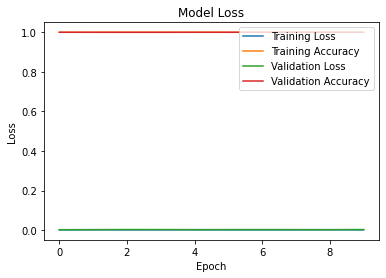

In [45]:
# Plotting Loss and Accuracy
plt.plot(history_df['loss'])
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_loss'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy'], loc='upper right');

In [46]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions = predictions.flatten()

In [47]:
predictions

array([2.3613525e-10, 1.6867725e-05, 9.5907185e-11, ..., 4.3968570e-12,
       6.7402620e-14, 3.2695194e-11], dtype=float32)

In [48]:
# Testing Model On Testing Data
testing = model.evaluate(test_data, test_labels)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0067 - accuracy: 0.9994


In [49]:
print(f"Test Loss: {testing[0]}")
print(f"Test Accuracy: {testing[1]}")

Test Loss: 0.006739362142980099
Test Accuracy: 0.9994148015975952


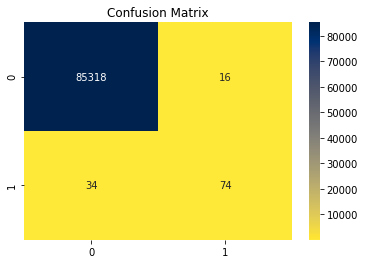

In [53]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(X_test)
y_test = pd.DataFrame(testing)
cm = confusion_matrix(test_labels, predictions.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.title("Confusion Matrix")
plt.show()